In [3]:
using JLD, PyPlot

In [40]:
archivo="/home/karel/RGutWork/kCSD/JLDForkCSDExacto2/evento_desinhibido_3.jld"

"/home/karel/RGutWork/kCSD/JLDForkCSDExacto2/evento_desinhibido_3.jld"

In [41]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 7 entries:
  "Canalesrespuesta" => Set([[51,31],[47,24],[50,29],[30,2],[46,14],[45,3],[43,…
  "KTT_KInv"         => 4093x4093 Array{Float64,2}:…
  "kCSDCorrecta"     => 64x64x2000 Array{Float64,3}:…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "LFPSaturados"     => 64x64x2000 Array{Float64,3}:…
  "freq"             => 7.022058198545425
  "CanalesSaturados" => Set([[57,10],[1,1],[5,43]])

In [42]:
CSD=Arxivo["kCSDCorrecta"];

In [43]:
listonga=(135,139,139)   

(135,139,139)

In [44]:
freq=Arxivo["freq"]
retrazo=Arxivo["retrazo"]

LoadError: KeyError: retrazo not found

In [45]:
retrazo=0

0

In [46]:
Arxivo["Nota"]

"Usamos las siguientes B y BT para obtener las Ks: BceroDura-r-0.25.dat y BtildeceroDura-r-0.25.dat"

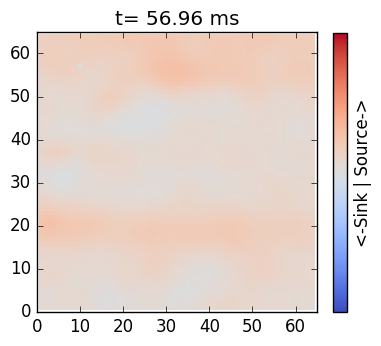

In [48]:
t=400
ion()
limites=100
figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,2)
title("t= $tiempo ms")
imagen=imshow((ejemplo), origin="lower", interpolation="none",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")

In [49]:
ioff()
limites=100
for t=1:1000
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,2)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_1915s1cut_singlevent_$t.png",dpi=90)
    close(figura)
end
PyPlot.close_figs()